In [ ]:
## Notebook env: mirtud_env (R kernel)
## This notebook quantifies the correlation between miR exp level in MDAMB231 and 
## the observed global txn effect upon knockdown of those miRs in mir_tud expt in MDAMB231

## We expect high expressing miRs to see a larger txn effect upon knockdown

In [1]:
library(stringr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## mir_tud data loading
mir_tud_edist_sep_controls = read.csv('/home/ssobti/projects/mir_tud/output_data/edist/updated_inputs/miR_etest_df_separate_controls_without_miR_families.csv')
mir_tud_edist_one_control = read.csv('/home/ssobti/projects/mir_tud/output_data/edist/updated_inputs/miR_etest_df_combined_controls_without_miR_families.csv')

In [3]:
colnames(mir_tud_edist_sep_controls)[1] = 'miR'
colnames(mir_tud_edist_one_control)[1] = 'miR'

In [4]:
## Loading miR expression levels (from lab's MDAMB231 miR expression sequencing)
MDAMB231_1_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_1.cnt', sep = '\t', header = FALSE)
MDAMB231_2_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_2.cnt', sep = '\t', header = FALSE)

In [5]:
colnames(MDAMB231_1_miRexp) = c('miR', 'count')
colnames(MDAMB231_2_miRexp) = c('miR', 'count')

In [6]:
MDAMB231_1_miRexp_filtered = MDAMB231_1_miRexp[startsWith(MDAMB231_1_miRexp$miR, 'hsa-'),]
MDAMB231_2_miRexp_filtered = MDAMB231_2_miRexp[startsWith(MDAMB231_2_miRexp$miR, 'hsa-'),]

In [7]:
MDAMB231_1_miRexp_filtered$miR = MDAMB231_1_miRexp_filtered$miR %>% str_remove('hsa-')
MDAMB231_2_miRexp_filtered$miR = MDAMB231_2_miRexp_filtered$miR %>% str_remove('hsa-')

In [8]:
mirtud_miRs_sep = mir_tud_edist_sep_controls$miR %>% str_remove('-5p') %>% str_remove('-3p') %>% str_remove('hsa-') %>% str_replace(pattern = 'miR', replacement = 'mir')
mirtud_miRs_one = mir_tud_edist_one_control$miR %>% str_remove('-5p') %>% str_remove('-3p') %>% str_remove('hsa-') %>% str_replace(pattern = 'miR', replacement = 'mir')


In [9]:
mir_tud_edist_sep_controls$miR = mirtud_miRs_sep
mir_tud_edist_one_control$miR = mirtud_miRs_one

In [10]:
### average the -5p and -3p mir's that are now shown as duplicates
mir_tud_duplicated_sep_edists = mir_tud_edist_sep_controls[(duplicated(mir_tud_edist_sep_controls$miR) | duplicated(mir_tud_edist_sep_controls$miR, fromLast = TRUE)),]$edist
mir_tud_duplicated_one_edists = mir_tud_edist_one_control[(duplicated(mir_tud_edist_one_control$miR) | duplicated(mir_tud_edist_one_control$miR, fromLast = TRUE)),]$edist
mir_tud_duplicated_sep_edists = colMeans(matrix(mir_tud_duplicated_sep_edists,2))
mir_tud_duplicated_one_edists = colMeans(matrix(mir_tud_duplicated_one_edists,2))

In [11]:
sep_duplicates = mir_tud_edist_sep_controls[(duplicated(mir_tud_edist_sep_controls$miR) | duplicated(mir_tud_edist_sep_controls$miR, fromLast = TRUE)),]
one_duplicates = mir_tud_edist_one_control[(duplicated(mir_tud_edist_one_control$miR) | duplicated(mir_tud_edist_one_control$miR, fromLast = TRUE)),]
sep_duplicates = sep_duplicates[duplicated(sep_duplicates$miR),]
one_duplicates = one_duplicates[duplicated(one_duplicates$miR),]


In [12]:
sep_non_duplicates = mir_tud_edist_sep_controls[!(duplicated(mir_tud_edist_sep_controls$miR) | duplicated(mir_tud_edist_sep_controls$miR, fromLast = TRUE)),]
one_non_duplicates = mir_tud_edist_one_control[!(duplicated(mir_tud_edist_one_control$miR) | duplicated(mir_tud_edist_one_control$miR, fromLast = TRUE)),]

In [13]:
nrow(sep_non_duplicates)
nrow(sep_duplicates)

[1] 195

[1] 64

In [14]:
mir_tud_edist_sep_controls_final = rbind(sep_non_duplicates, sep_duplicates)
mir_tud_edist_one_control_final = rbind(one_non_duplicates, one_duplicates)

In [15]:
length(intersect(mir_tud_edist_sep_controls_final$miR, MDAMB231_1_miRexp_filtered$miR))
length(intersect(mir_tud_edist_one_control_final$miR, MDAMB231_1_miRexp_filtered$miR))

[1] 192

[1] 192

In [16]:
rownames(MDAMB231_1_miRexp_filtered) = MDAMB231_1_miRexp_filtered$miR
rownames(MDAMB231_2_miRexp_filtered) = MDAMB231_2_miRexp_filtered$miR
rownames(mir_tud_edist_sep_controls_final) = mir_tud_edist_sep_controls_final$miR
rownames(mir_tud_edist_one_control_final) = mir_tud_edist_one_control_final$miR


In [17]:
intersecting_miRs_sep_controls_MDAMB231_1 = intersect(rownames(mir_tud_edist_sep_controls_final), rownames(MDAMB231_1_miRexp_filtered))
intersecting_miRs_one_control_MDAMB231_1 = intersect(rownames(mir_tud_edist_one_control_final), rownames(MDAMB231_1_miRexp_filtered))


In [18]:
plot_df_miRs_sep_controls_MDAMB231_1 = data.frame(miRs = intersecting_miRs_sep_controls_MDAMB231_1, 
                     expression = MDAMB231_1_miRexp_filtered[intersecting_miRs_sep_controls_MDAMB231_1, 'count'], 
                     edist = mir_tud_edist_sep_controls_final[intersecting_miRs_sep_controls_MDAMB231_1,'edist'])

In [19]:
plot_df_miRs_one_control_MDAMB231_1 = data.frame(miRs = intersecting_miRs_one_control_MDAMB231_1, 
                     expression = MDAMB231_1_miRexp_filtered[intersecting_miRs_one_control_MDAMB231_1, 'count'], 
                     edist = mir_tud_edist_one_control_final[intersecting_miRs_one_control_MDAMB231_1,'edist'])

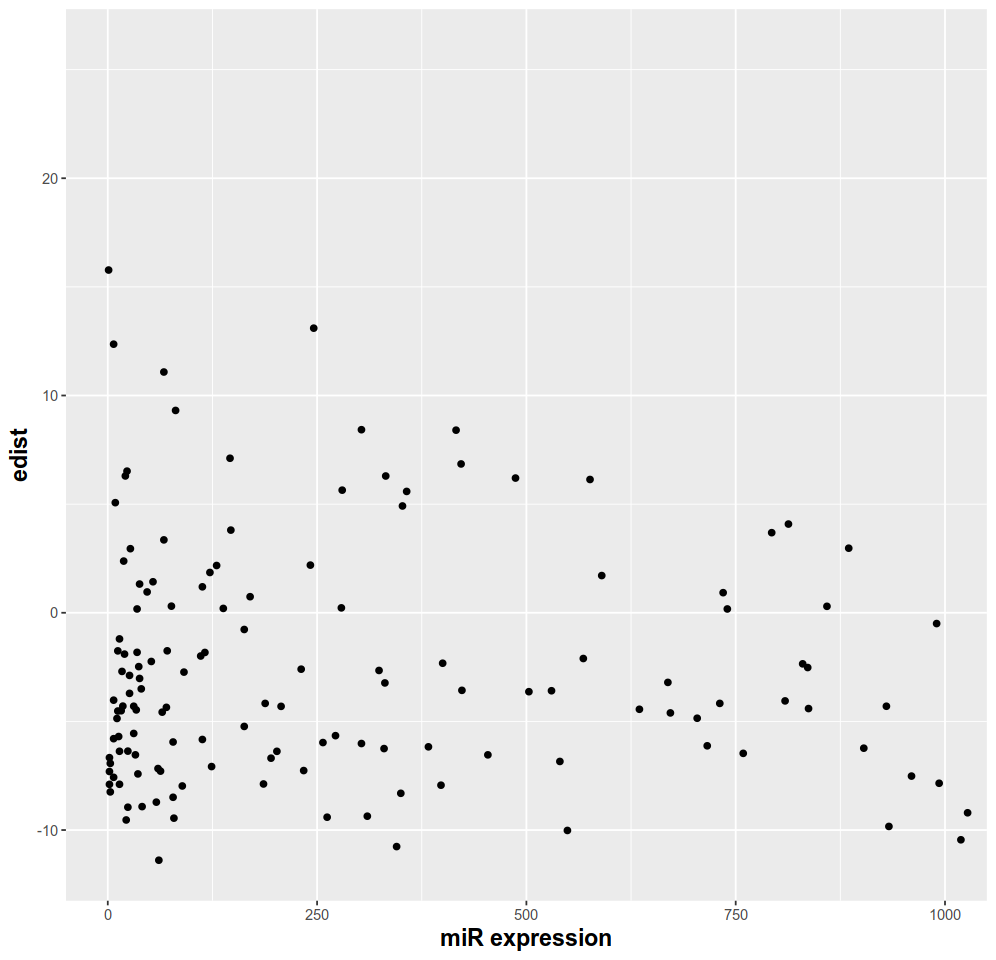

In [20]:
options(repr.plot.width=8.3, repr.plot.height=8)
ggplot(plot_df_miRs_sep_controls_MDAMB231_1, aes(expression, edist)) + geom_point() + coord_cartesian(xlim = c(0, 1000)) + xlab('miR expression') + theme(axis.title=element_text(size=14,face="bold"))

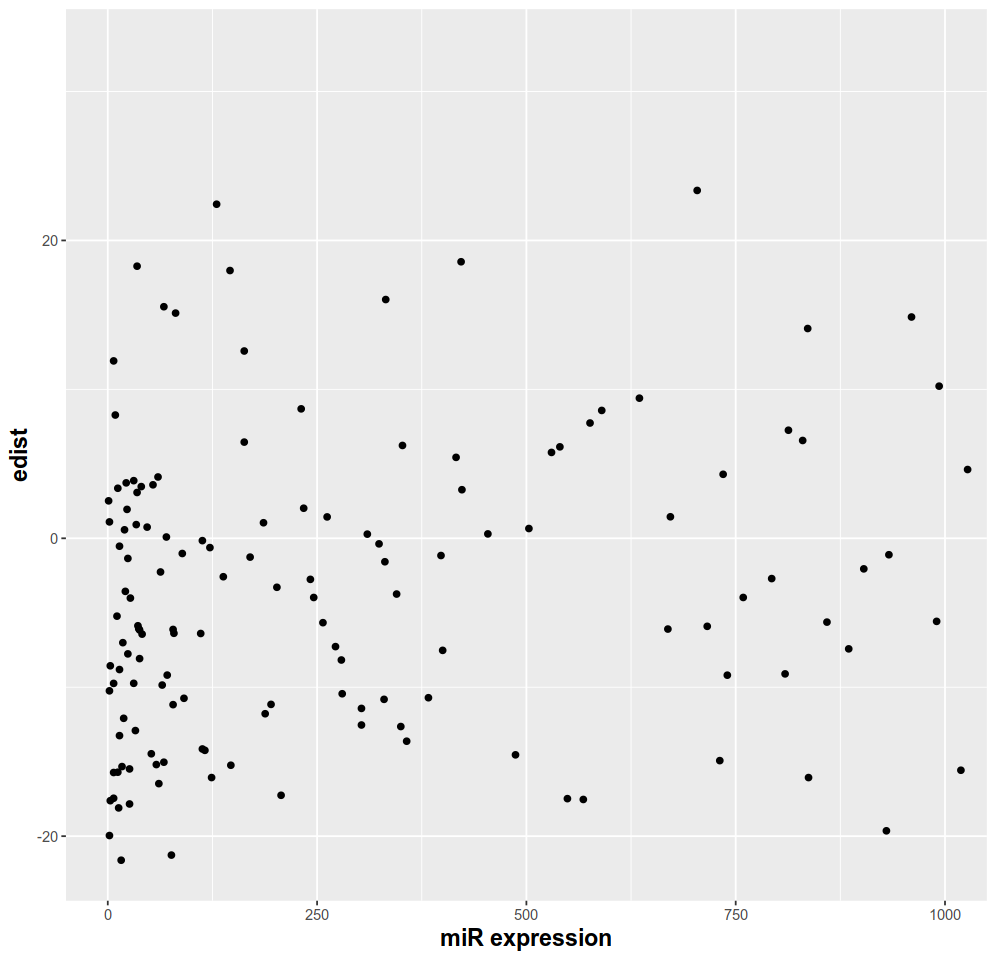

In [21]:
ggplot(plot_df_miRs_one_control_MDAMB231_1, aes(expression, edist)) + geom_point() + coord_cartesian(xlim = c(0, 1000)) + xlab('miR expression') + theme(axis.title=element_text(size=14,face="bold"))

In [22]:
## normalize the distances and expression from 0 to 1
plot_df_miRs_sep_controls_MDAMB231_1$expression = plot_df_miRs_sep_controls_MDAMB231_1$expression/max(plot_df_miRs_sep_controls_MDAMB231_1$expression)

normalization_vec = plot_df_miRs_sep_controls_MDAMB231_1$edist
normalization_vec2 = normalization_vec + abs(min(normalization_vec))
normalization_vec2 = normalization_vec2/max(normalization_vec2)
plot_df_miRs_sep_controls_MDAMB231_1$edist = normalization_vec2

In [23]:
plot_df_miRs_one_control_MDAMB231_1$expression = plot_df_miRs_one_control_MDAMB231_1$expression/max(plot_df_miRs_one_control_MDAMB231_1$expression)

normalization_vec = plot_df_miRs_one_control_MDAMB231_1$edist
normalization_vec2 = normalization_vec + abs(min(normalization_vec))
normalization_vec2 = normalization_vec2/max(normalization_vec2)
plot_df_miRs_one_control_MDAMB231_1$edist = normalization_vec2

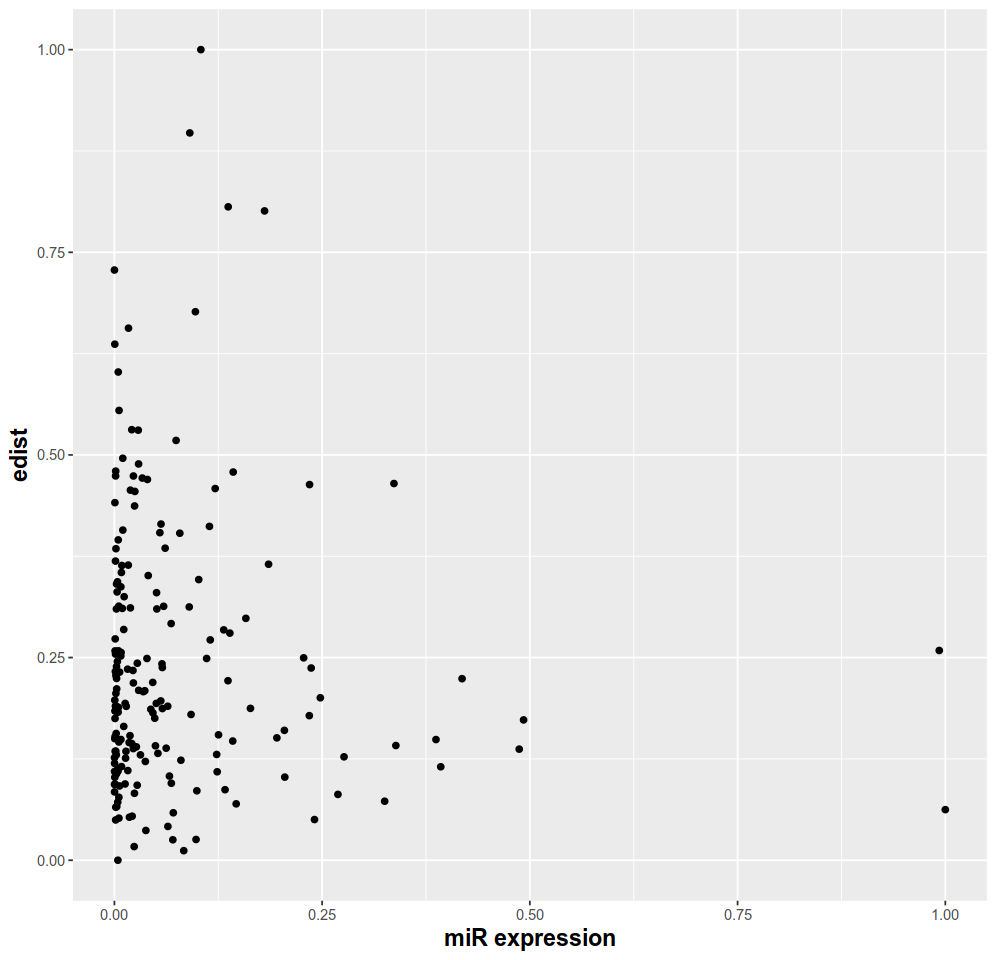

In [24]:
ggplot(plot_df_miRs_sep_controls_MDAMB231_1, aes(expression, edist)) + geom_point() + xlab('miR expression') + theme(axis.title=element_text(size=14,face="bold"))

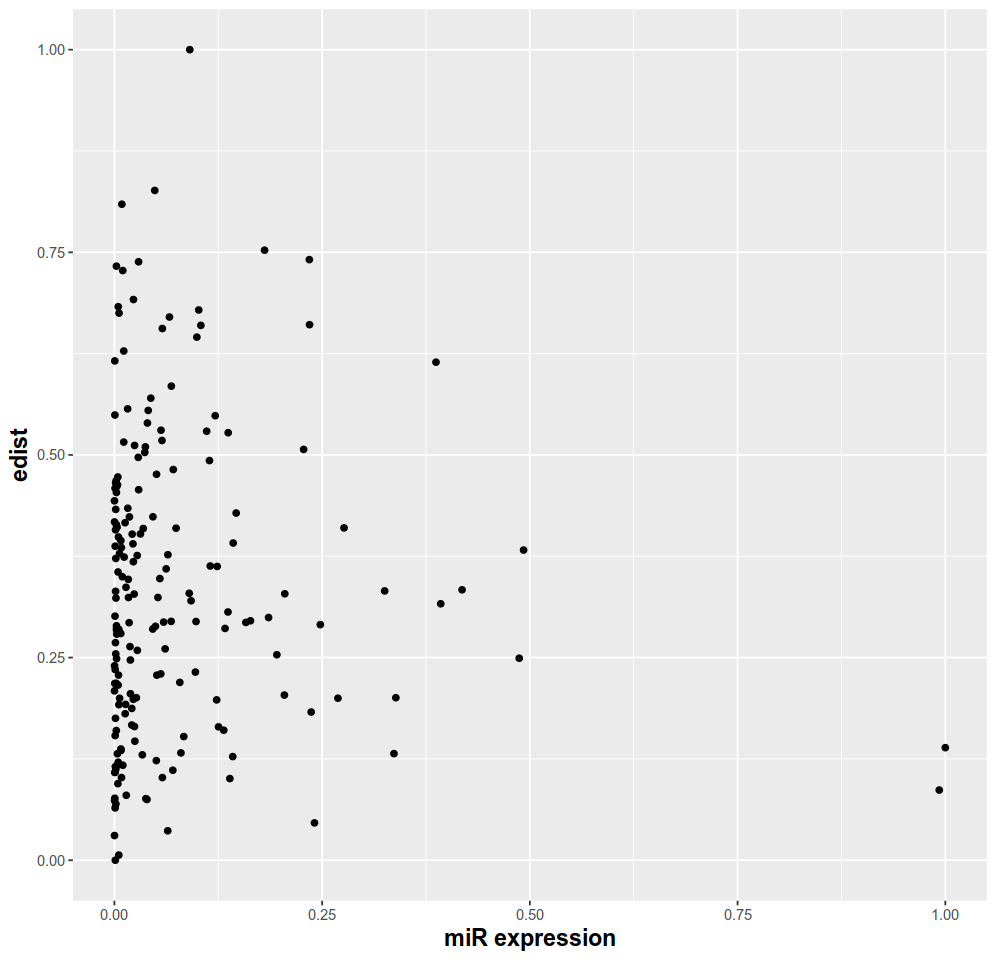

In [25]:
ggplot(plot_df_miRs_one_control_MDAMB231_1, aes(expression, edist)) + geom_point() + xlab('miR expression') + theme(axis.title=element_text(size=14,face="bold"))